In [16]:
import os
import numpy as np
os.getcwd()

'/home/prasad/Downloads/data/TrafficSigns'

In [7]:
import skimage.data
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images, labels

ROOT_PATH = "/home/prasad/Downloads/data/TrafficSigns/"
train_data_directory = os.path.join(ROOT_PATH, "Training")
test_data_directory = os.path.join(ROOT_PATH, "Testing")

images, labels = load_data(train_data_directory)

In [14]:
type(images)

list

In [22]:
images = np.array(images)
print(images.ndim)
print images.size
images[0]

1
4575


array([[[40, 36, 26],
        [46, 44, 32],
        [51, 51, 37],
        ...,
        [36, 26, 27],
        [36, 27, 27],
        [37, 29, 29]],

       [[42, 38, 29],
        [46, 44, 33],
        [51, 50, 37],
        ...,
        [35, 25, 25],
        [36, 26, 27],
        [37, 29, 29]],

       [[42, 38, 29],
        [45, 42, 33],
        [48, 46, 35],
        ...,
        [34, 24, 24],
        [34, 25, 25],
        [36, 28, 28]],

       ...,

       [[36, 27, 27],
        [36, 27, 27],
        [36, 26, 28],
        ...,
        [36, 29, 26],
        [37, 28, 26],
        [37, 28, 26]],

       [[36, 27, 26],
        [36, 27, 26],
        [36, 27, 26],
        ...,
        [36, 28, 26],
        [36, 28, 26],
        [37, 28, 26]],

       [[35, 27, 26],
        [35, 27, 25],
        [35, 27, 25],
        ...,
        [35, 27, 25],
        [35, 26, 25],
        [36, 27, 25]]], dtype=uint8)

In [24]:
labels = np.array(labels)
print labels.ndim
print labels.size
print len(set(labels))

1
4575
62


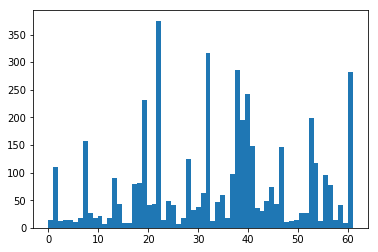

In [25]:
# Import the `pyplot` module
import matplotlib.pyplot as plt 

# Make a histogram with 62 bins of the `labels` data
plt.hist(labels, 62)

# Show the plot
plt.show()

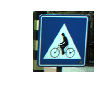

shape: (194, 193, 3), min: 0, max: 255


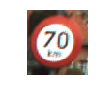

shape: (67, 63, 3), min: 14, max: 255


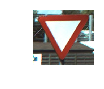

shape: (151, 169, 3), min: 8, max: 255


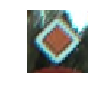

shape: (43, 42, 3), min: 0, max: 255


In [27]:
# Import `matplotlib`
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images[traffic_signs[i]].shape,images[traffic_signs[i]].min(),images[traffic_signs[i]].max()))

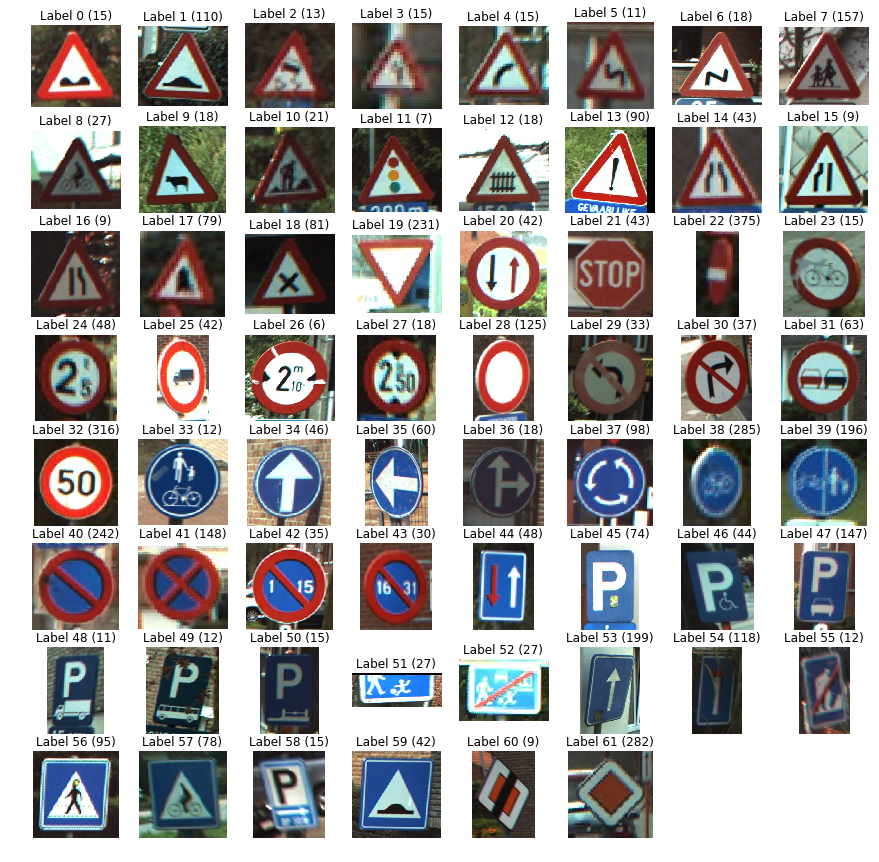

In [30]:
# Import the `pyplot` module as `plt`
import matplotlib.pyplot as plt 

labels = list(labels)

# Get the unique labels 
unique_labels = set(labels)

# Initialize the figure
plt.figure(figsize=(15, 15))

# Set a counter
i = 1

# For each unique label,
for label in unique_labels:
    # You pick the first image for each label
    image = images[labels.index(label)]
    # Define 64 subplots 
    plt.subplot(8, 8, i)
    # Don't include axes
    plt.axis('off')
    # Add a title to each subplot 
    plt.title("Label {0} ({1})".format(label, labels.count(label)))
    # Add 1 to the counter
    i += 1
    # And you plot this first image 
    plt.imshow(image)
    
# Show the plot
plt.show()

In [31]:
#To tackle the differing image sizes, you’re going to rescale the images

# Import the `transform` module from `skimage`
from skimage import transform 

# Rescale the images in the `images` array to 28 * 28 
images28 = [transform.resize(image, (28, 28)) for image in images]

/usr/local/lib/python2.7/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python2.7/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [35]:
# the color in the pictures matters less when you’re trying to answer a classification question
# Import `rgb2gray` from `skimage.color`
from skimage.color import rgb2gray

# Convert `images28` to an array
images28 = np.array(images28)

# Convert `images28` to grayscale
images28 = rgb2gray(images28)

In [37]:
# Import `tensorflow` 
import tensorflow as tf 

# Initialize placeholders 
x = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.placeholder(dtype = tf.int32, shape = [None])

# Flatten the input data
images_flat = tf.contrib.layers.flatten(x)

# Fully connected layer 
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

# Define a loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, 
                                                                    logits = logits))
# Define an optimizer 
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

# Convert logits to label indexes
correct_pred = tf.argmax(logits, 1)

# Define an accuracy metric
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [38]:
print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", correct_pred)

('images_flat: ', <tf.Tensor 'Flatten_1/flatten/Reshape:0' shape=(?, 784) dtype=float32>)
('logits: ', <tf.Tensor 'fully_connected_1/Relu:0' shape=(?, 62) dtype=float32>)
('loss: ', <tf.Tensor 'Mean_2:0' shape=() dtype=float32>)
('predicted_labels: ', <tf.Tensor 'ArgMax_1:0' shape=(?,) dtype=int64>)


In [39]:
tf.set_random_seed(1234)
sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(201):
        print('EPOCH', i)
        _, accuracy_val = sess.run([train_op, accuracy], feed_dict={x: images28, y: labels})
        if i % 10 == 0:
            print("Loss: ", loss)
        print('DONE WITH EPOCH')

('EPOCH', 0)
('Loss: ', <tf.Tensor 'Mean_2:0' shape=() dtype=float32>)
DONE WITH EPOCH
('EPOCH', 1)
DONE WITH EPOCH
('EPOCH', 2)
DONE WITH EPOCH
('EPOCH', 3)
DONE WITH EPOCH
('EPOCH', 4)
DONE WITH EPOCH
('EPOCH', 5)
DONE WITH EPOCH
('EPOCH', 6)
DONE WITH EPOCH
('EPOCH', 7)
DONE WITH EPOCH
('EPOCH', 8)
DONE WITH EPOCH
('EPOCH', 9)
DONE WITH EPOCH
('EPOCH', 10)
('Loss: ', <tf.Tensor 'Mean_2:0' shape=() dtype=float32>)
DONE WITH EPOCH
('EPOCH', 11)
DONE WITH EPOCH
('EPOCH', 12)
DONE WITH EPOCH
('EPOCH', 13)
DONE WITH EPOCH
('EPOCH', 14)
DONE WITH EPOCH
('EPOCH', 15)
DONE WITH EPOCH
('EPOCH', 16)
DONE WITH EPOCH
('EPOCH', 17)
DONE WITH EPOCH
('EPOCH', 18)
DONE WITH EPOCH
('EPOCH', 19)
DONE WITH EPOCH
('EPOCH', 20)
('Loss: ', <tf.Tensor 'Mean_2:0' shape=() dtype=float32>)
DONE WITH EPOCH
('EPOCH', 21)
DONE WITH EPOCH
('EPOCH', 22)
DONE WITH EPOCH
('EPOCH', 23)
DONE WITH EPOCH
('EPOCH', 24)
DONE WITH EPOCH
('EPOCH', 25)
DONE WITH EPOCH
('EPOCH', 26)
DONE WITH EPOCH
('EPOCH', 27)
DONE WITH EP

In [45]:
# Import `matplotlib`
import matplotlib.pyplot as plt
import random

# Pick 10 random images


# Run the "correct_pred" operation
predicted = sess.run([correct_pred], feed_dict={x: images28})[0]
                        
count=0

for i in range(len(images28)):
    if(labels[i] == predicted[i]):
        count = count+1;
        
print(count/float(len(images28)))

0.655081967213


In [47]:
# Import `skimage`
from skimage import transform

# Load the test data
test_images, test_labels = load_data(test_data_directory)

# Transform the images to 28 by 28 pixels
test_images28 = [transform.resize(image, (28, 28)) for image in test_images]

# Convert to grayscale
from skimage.color import rgb2gray
test_images28 = rgb2gray(np.array(test_images28))

# Run predictions against the full test set.
predicted = sess.run([correct_pred], feed_dict={x: test_images28})[0]

# Calculate correct matches 
match_count = sum([int(y == y_) for y, y_ in zip(test_labels, predicted)])

# Calculate the accuracy
accuracy = match_count / float(len(test_labels))

# Print the accuracy
print("Accuracy: {:.3f}".format(accuracy))

Accuracy: 0.592
